Last update: 17 Nov 2023    

## Abstract
This Jupyter notebook uses the [SymPy](https://www.sympy.org/), [NumPy](https://numpy.org/),[SciPy](https://scipy.org/) and the [Python](https://www.python.org/) programming language libraries to analyize a phono preamplifier circuit from [1]. The schematic for the phono preamplifier was entered into [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) and the circuit netlist was generated. [Modified Nodal Analysis](https://en.wikipedia.org/wiki/Modified_nodal_analysis) was used to derive the circuit equations and Python libraries were used to solve the equations. The preamplifier transfer function was used to calculate the Bode, impuse and step response plots. The Python results were compared to those from LTSpice. Deviation from the RIAA response curve was also examined. Practical implementation considerations are discussed. The sensitivity, error budget and temperature analysis for the preamplifier circuit was performed. Alternate preamplifier circuits were analyized and evaluated. Finally, a new circuit was sythysized from the inverse RIAA tranfser function. 

**Contents**  
1. [Introduction](#section1)  
2. [RIAA pre-emphasis curve](#section2)  
3. [Application note RIAA Phono Preamplifier Design Procedure](#section3)  
4. [Analysis of the phono preamplifier circuit](#section4)  
5. [Alternate designs](#section5)  
6. [Summary](#section6)  

**License:**  This work (includes python code, documentation, test circuits, etc.) is licensed under a Creative Commons Attribution-ShareAlike 4.0 International License.  
Share — copy and redistribute the material in any medium or format  
Adapt — remix, transform, and build upon the material for any purpose, even commercially.  
https://creativecommons.org/licenses/by-sa/4.0/  

<img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" />

## 1) Introduction  <a id="section1"></a>
- what why and how?

What is a Phono Preamp and Why Do I Need One?
A phono preamplifier, also known as a phono stage, is an audio component that amplifies the signal from your turntable to a level that allows you to connect it to your sound system the same way you would with any other audio source.

Another important job of a phono preamp is to apply the RIAA equalization curve to the signal, reverting it back to the shape it was on the original recording, but if you’re just starting out, this may be a bit deeper than you need to go right now. The most important thing to know is that you will need a phono preamp in order to enjoy your vinyl records.

With the resurgence of vinyl over the last several years, a whole new generation is getting into turntables. With so much “plug and play” technology, we find that people who are younger or have never used a turntable before expect that a turntable will just play, or at least simply connect to their existing stereo system or speakers.

popularity of vynal LP records

[1 Out of Every 3 Albums Sold in the US in 2021 Were Vinyl LPs](https://www.billboard.com/pro/vinyl-sales-new-record-past-cds-2021/#!)

[Why Vinyl Records Are Making a Comeback in 2022](https://www.themanual.com/culture/why-vinyl-is-coming-back/)

>This year, 2020, marks the first year in more than a generation since record sales — that is to say physical vinyl records — have surpassed CD sales. The reasons for this are twofold: CD sales have dropped dramatically in recent years, while sales of vinyl records are actually up this year. And while you might think it’s nostalgic Boomers or Gen Xers behind the renaissance of records, in fact surveys show it’s millennial consumers driving the rising trend in vinyl sales.

>So vinyl is here to stay, it seems, despite all technological advances that would have seemed to threaten it. The same RIAA study that found records surpassing CDs also revealed that streaming music now account for more than 85% of all music enjoyed. Only 6% of music is now downloaded, even less than is physically purchased in the form of records, CDs, or the last tapes.

There are hundreds of phon preamps being sold on amazon ranging in price from \$10 to \$1,000 dollars. 

https://www.amazon.com/Pro-Ject-Audio-Phono-preamp-Output/dp/B007DB5I60/ref=sr_1_4?crid=2KH3PW5538BKW&keywords=phono%2Bpre%2Bamp&qid=1700522866&sprefix=phono%2Bpre%2Bamp%2Caps%2C162&sr=8-4&ufe=app_do%3Aamzn1.fos.18630bbb-fcbb-42f8-9767-857e17e03685&th=1


Pro-Ject Phono Box DC MM/MC Phono Preamp with Line Output (Black)
Visit the Pro-Ject Store
4.5 4.5 out of 5 stars 759 ratings
| 71 answered questions
Amazon's Choice Overall Pick
$129.00
$129.00
Or $21.50 /mo (6 mo). Select from 2 plans
One-Day
FREE Returns 

https://www.amazon.com/Cambridge-Audio-Moving-Magnet-Preamplifier/dp/B0793363RG/ref=sr_1_20?crid=2KH3PW5538BKW&keywords=phono+pre+amp&qid=1700522866&sprefix=phono+pre+amp%2Caps%2C162&sr=8-20&ufe=app_do%3Aamzn1.fos.18630bbb-fcbb-42f8-9767-857e17e03685

Cambridge Audio Alva Solo | Phono Preamp for Moving Magnet Turntable
Visit the Cambridge Audio Store
4.7 4.7 out of 5 stars 174 ratings
| 32 answered questions
Amazon's Choice in Audio Component Preamplifiers by Cambridge Audio
Lowest price in 30 days
$199.00 with 13 percent savings -13%
$199.00
List Price: $229.00 List Price:
$229.00 

https://www.amazon.com/Schiit-Phono-Preamp-Cartridges-Black/dp/B09S5H9MP6/ref=sr_1_20?crid=2KH3PW5538BKW&keywords=phono+pre+amp&qid=1700522935&sprefix=phono+pre+amp%2Caps%2C162&sr=8-20&ufe=app_do%3Aamzn1.fos.18630bbb-fcbb-42f8-9767-857e17e03685
Schiit Mani 2 Phono Preamp for MM, MC, and MI Cartridges (Black)
Visit the Schiit Store
4.5 4.5 out of 5 stars 50 ratings
| 11 answered questions
Amazon's Choice in Home Audio Phono Preamps by Schiit
$188.00
$188.00
Or $31.33 /mo (6 mo). Select from 2 plans
Overnight
FREE Returns
Or $31.33/month for 6 months with 0% interest financing on your Prime Store Card
https://www.schiit.com/products/mani

Mani
MM/MC Phono Preamp
Finish
AC Adapter
$149

Skoll
Balanced, Discrete MM/MC Phono Preamp with Remote Control
AC Adapter
$399

https://www.amazon.com/Pro-Ject-Audio-Phono-Preamplifier-Silver/dp/B008UV5CAY/ref=sr_1_4?crid=2KH3PW5538BKW&keywords=phono+pre+amp&qid=1700523083&sprefix=phono+pre+amp%2Caps%2C162&sr=8-4&ufe=app_do%3Aamzn1.fos.ac578592-0362-4e0a-958c-0f2dd61d30d4
Pro-Ject Phono Box RS Premium MM/MC Phono Preamplifier (Silver) 

Pro-Ject Phono Box RS Premium MM/MC Phono Preamplifier (Silver)
Brand: Pro-Ject
3.2 3.2 out of 5 stars 7 ratings
$1,199.00
$1,199.00
Or $99.92 /mo (12 mo). Select from 2 plans
FREE Returns
Or $99.92/month for 12 months with 0% interest financing on your Prime Store Card



The analysis and design of electronic filters can be mathematically intense, however with modern computer codes, the computatinal burgen is carried by the moder desk top computer. What followes illustrates the easy in which these computations can be perforned. Just like the transitin from slide rules to electronic pocket calculates in the 1970's, the PC's of the moder era eliminate smuch of the compoutatinal drgrgery.



- circuit analysis of ref 1 - what to call referecne circuit?  
  - what is the circuit
  - what does it do
- use of python libraries for circuit analysis
- what is the RIAA equalization curve
- LP vynal recrodings: [LP record](https://en.wikipedia.org/wiki/LP_record)

AN-346 High-Performance Audio Applications
of the LM833

Circuit name:
~~Two amplifier phono preamp
LM833 phono preamp~~
The AN-346 phono preamp, refered to as the preamp.


The following circuit is a two Stage RIAA Phono Preamplifier. The circuit was entered into LTSpice and the schematic is shown below:

<img src='Two amplifier RIAA Phone Preamp.png' width="750">  

[RIAA](https://en.wikipedia.org/wiki/Recording_Industry_Association_of_America) was formed in 1952. Its original mission was to administer recording copyright fees and problems, work with trade unions, and do research relating to the record industry and government regulations. Early RIAA standards included the RIAA equalization curve, the format of the stereophonic record groove and the dimensions of 33 1/3, 45, and 78 rpm records.


The Op Amps used in the LTSpice simulation are ideal single pole operational amplifiers with Aol=100K and GBW=10Meg. The component reference designators are the same as in [1], except for R20 and R22. The nodes have been numbered from right to left.

$\large{\color {red} {\text{remove R22 in next global update}}}$  

[RIAA equalization](https://en.wikipedia.org/wiki/RIAA_equalization) is a specification for the recording and playback of phonograph records, established by the Recording Industry Association of America (RIAA). The purposes of the equalization are to permit greater recording times (by decreasing the mean width of each groove), to improve sound quality and to reduce the groove damage that would otherwise arise during playback. RIAA equalization is a form of pre-emphasis on recording and de-emphasis on playback. A recording is made with the low frequencies reduced and the high frequencies boosted, and on playback, the opposite occurs. The net result is a flat frequency response, but with attenuation of high-frequency noise such as hiss and clicks that arise from the recording medium. Reducing the low frequencies also limits the excursions the cutter needs to make when cutting a groove. Groove width is thus reduced, allowing more grooves to fit into a given surface area, permitting longer recording times. This also reduces physical stresses on the stylus, which might otherwise cause distortion or groove damage during playback.

Phono cartridge output varies depending on the type of phono cartridge. Moving Magnet (MM) or Moving Iron (MI) cartridges typically produce a maximum output of 5mV. Moving Coil (MC) cartridges produce a much lower output, typically around 0.5mV. V1 in the schematic is set to 5mV.


remove programing libraries from references, just hyper link

**Reference:**  
1. [AN-346 High-Performance Audio Applications of the LM833](https://www.ti.com/lit/an/snoa586d/snoa586d.pdf), May 2013, Texas Instruments Incorporated

```
1. [SymPy](https://www.sympy.org/), Python library for symbolic mathematics
2. [NumPy](https://numpy.org/), Python library for scientific computing
3. [SciPy](https://scipy.org/), algorithms for scientific computing in Python 
4. [Python](https://www.python.org/) [programming language](https://en.wikipedia.org/wiki/Python_(programming_language)), a high-level, general-purpose programming language, 
6. [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html), SPICE ("Simulation Program with Integrated Circuit Emphasis") is a general-purpose, open-source analog electronic circuit simulator from [Analog Devices](https://www.analog.com/en/index.html)
7. [Modified Nodal Analysis](https://en.wikipedia.org/wiki/Modified_nodal_analysis), an extension of nodal analysis which not only determines the circuit's node voltages (as in classical nodal analysis), but also some branch currents
```

In [136]:
import os
from sympy import *
import numpy as np
from scipy import signal
from sympy.physics.control.lti import TransferFunction, Series, Parallel
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot
import matplotlib.pyplot as plt
init_printing()

## 2) RIAA pre-emphasis curve  <a id="section2"></a>

RIAA playback equalization is not a simple low-pass filter. It defines transition points in three places: 75 μs, 318 μs and 3180 μs, which correspond to 2122 Hz, 500 Hz and 50 Hz. The pre-emphasis transfer function is expressed as follows, where T1 = 3180 μs, T2 = 318 μs and T3 = 3180 μs.

$f(s)=\frac {(sT_{1}+1)(sT_{3}+1)}{(sT_{2}+1)}$

In [137]:
1/(2*np.pi)

In [138]:
2122/(2*np.pi) # convert to rad/s

In [139]:
500/(2*np.pi) # convert to rad/s

In [140]:
50/(2*np.pi) # convert to rad/s

In [141]:
(1/75e-6)/(2*np.pi)

In [142]:
(1/318e-6)/(2*np.pi)

In [143]:
(1/3180e-6)/(2*np.pi)

In [144]:
(50*2*np.pi) # convert rad/s

In [145]:
1/(50*2*np.pi) # convert to sec per cycle in radian units

In [146]:
1/(500*2*np.pi) # convert to sec per cycle in radian units

In [147]:
1/(2122*2*np.pi) # convert to sec per cycle in radian units

In [148]:
F1 = 50
print('{:.0f} Hz is {:,.1f} sec per radian cycle'.format(F1,1/(F1*2*np.pi)*1e6))

F2 = 500
print('{:.0f} Hz is {:,.1f} usec per radian cycle'.format(F2,1/(F2*2*np.pi)*1e6))

F3 = 2122
print('{:,.0f} Hz is {:.1f} usec per radian cycle'.format(F3,1/(F3*2*np.pi)*1e6))

50 Hz is 3,183.1 sec per radian cycle
500 Hz is 318.3 usec per radian cycle
2,122 Hz is 75.0 usec per radian cycle


In [149]:
2122*(2*np.pi) # convert to Hz

In [150]:
1/_ # convert to sec

In [151]:
1/2122/(2*np.pi)

In [152]:
s = symbols('s')

In [153]:
num1 = Eq(((s*3180e-6+1)*(s*75e-6+1)),0)
num1

In [154]:
denom1 = Eq(s*318e-6+1,0)
denom1

### plot poles and zeros, what are the units?

In [155]:
zeros = solve(num1,s)
zeros

In [158]:
zeros[0]

In [156]:
poles = solve(denom1,s)
poles

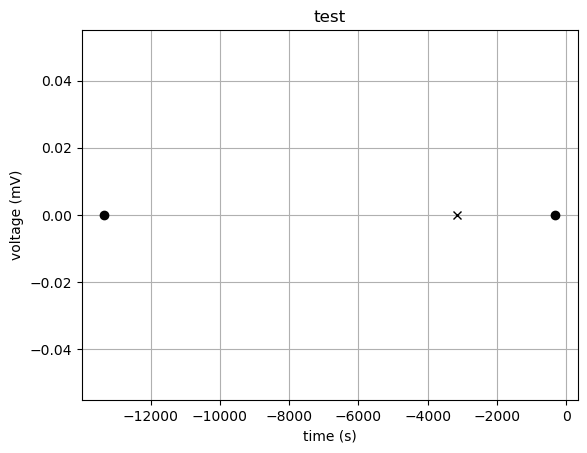

In [171]:
fig, ax = plt.subplots()

ax.plot(zeros[0], 0, 'ok')
ax.plot(zeros[1], 0, 'ok')
ax.plot(poles[0], 0, 'xk')

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='test')
ax.grid()

plt.show()

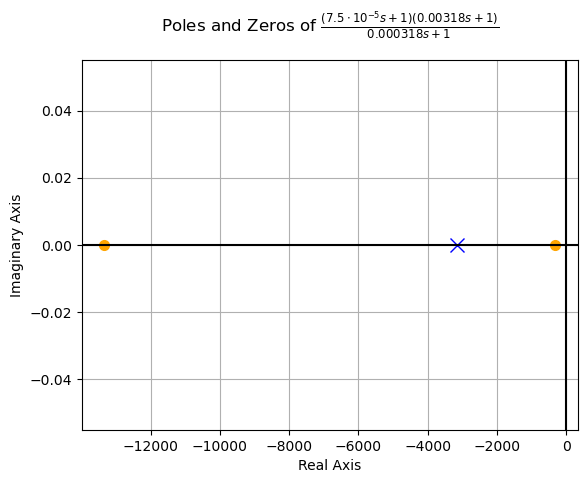

In [22]:
tf1 = TransferFunction((s*3180e-6+1)*(s*75e-6+1), s*318e-6+1, s)
pole_zero_plot(tf1)  

In [23]:
tf1

In [24]:
tf1.num

In [25]:
tf1.den

In [26]:
Poly(tf1.num, s).all_coeffs()

need to remove commented code

In [27]:
# convert symbolic to numpy polynomial
a = np.array(Poly(tf1.num, s).all_coeffs(), dtype=float)
b = np.array(Poly(tf1.den, s).all_coeffs(), dtype=float)
system_petf = (a, b) # system for pre-emphasis transfer function

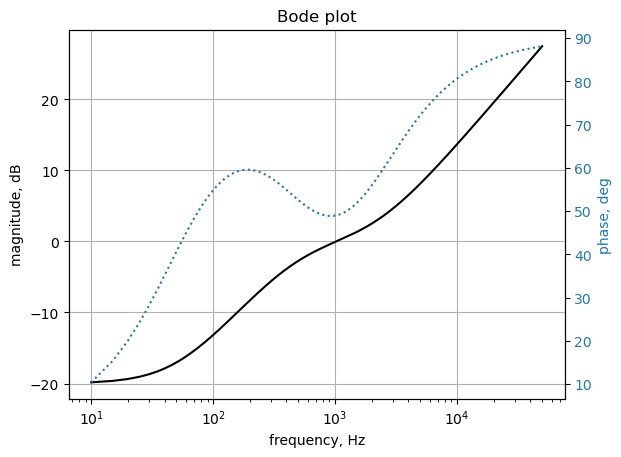

In [28]:
x = np.linspace(10*2*np.pi, 50e3*2*np.pi, 10000, endpoint=True)
w_petf, mag_petf, phase_petf = signal.bode(system_petf, w=x)

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

#plt.semilogx(w, mag)    # Bode magnitude plot
#plt.plot(w/(2*np.pi*1e6), mag,'-k')    # Bode magnitude plot
#plt.plot(w/(2*np.pi), mag,'-k')    # Bode magnitude plot
plt.semilogx(w_petf/(2*np.pi), mag_petf-20,'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,30))
#ax1.set_xlim((27e6*2*np.pi,33e6*2*np.pi))
#ax1.set_xlim((27,33))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

#plt.semilogx(w, phase,'-g')  # Bode phase plot
#plt.plot(w/(2*np.pi), phase,':',color=color)  # Bode phase plot
plt.semilogx(w_petf/(2*np.pi), phase_petf,':',color=color)  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

The above looks same as in ref.

Try to plot the difference, use the complex values and then plot mag and phase.

In [29]:
gain = TransferFunction(-.10,1,s)

In [30]:
tf1a = Series(tf1, gain)

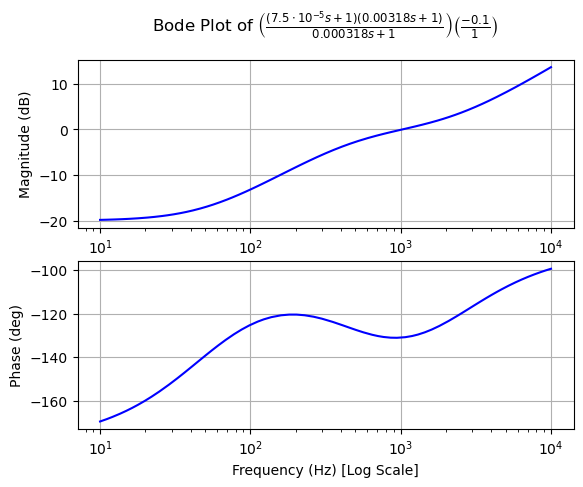

In [31]:
bode_plot(tf1a,initial_exp=1, final_exp=4,freq_unit='Hz', phase_unit='deg')  

Phase is offset and not the same.  OK need to fix up the phase or add some comments. or leave un normalized. 

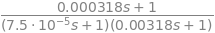

In [33]:
tf2 = TransferFunction(s*318e-6+1,(s*3180e-6+1)*(s*75e-6+1), s)
tf2

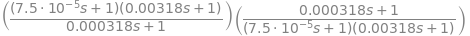

In [34]:
tf3 = Series(tf1, tf2)
tf3

In [35]:
tf3.to_expr().simplify()

## 3) Application note RIAA Phono Preamplifier Design Procedure  <a id="section3"></a>
component value calculations ... 

Even better performance can be obtained by using the two-amplifier approach of Figure 3. The first
operational amplifier takes care of the 50 Hz and 500 Hz breakpoints, while the 2122 Hz rolloff is
accomplished by the passive network R3, R6, and C3. The second amplifier supplies additional gain—10
dB in this example. Using two amplifiers results in accurate conformance to the RIAA curve without
reverting to the noisy inverting topology, as well as lower distortion due to the fact that each amplifier is
operating at a lower gain than would be the case in a single-amplifier design. Also, the amplifiers are not
required to drive capacitive feedback networks with the full preamplifier output voltages, further reducing
distortion compared to the single-amplifier designs.

Also see: Appendix A Derivation of RIAA Phono Preamplifier Design Equation 13, Equation 15, and Equation 16.


}---  
In this article, we’ll explore the basics of building a phono preamp, including the necessary power supplies, gain stages, and circuit designs. Whether you’re an experienced electronics experimenter or a beginner looking to dive into DIY audio projects, this guide will provide you with all the information you need to get started.

https://www.andyc.diy-audio-engineering.org/phono-preamp/index.html

}---


Calculations from [1], see page 5 of the app note

1) Choose R0. R0 should be small for minimum noise contribution, but not so small that the feedback network excessively loads the amplifier.
Example: Choose R0 = 500

2) Choose 1 kHz gain, AV1 of first amplifier. This will typically be around 20 dB to 30 dB.Example: Choose AV1 = 26 dB = 20

3) Calculate R1 = 8.058*R0*AV1

In [36]:
Av1 = 20
Ro = 500
R1 = 8.058 * Ro * Av1
R1

4) Calculate C1

In [37]:
C1 = 3.18e-3/R1 # C1
C1

5) If C1 is not a convenient value, choose the nearest convenient value and calculate a new R1 from:

In [38]:
C1 = 0.039e-6
R1 = 3.18e-3/C1
R1

In [39]:
R1 = 80.6e3 # use this value

Calculate a new value for Ro

In [40]:
Ro = R1/(8.058*Av1)
Ro

In [41]:
Ro = 499 # use this value

6. Caluclate R2

In [42]:
R2 = R1/9-Ro
R2

In [43]:
R2 = 8.45e3 # use this value

7. Choose a convenient value for C3 in the range from 0.01 μF to 0.05 μF.  
Example: C3 = 0.033 μF

In [44]:
C3 = 0.033e-6

8. Calculate Rp

In [45]:
Rp = 7.5e-5/C3
Rp

9. Choose a standard value for R3 that is slightly larger than RP.  
Example: R3 = 2.37k

In [46]:
R3 = 2.37e3

10. Calculate R6 from 1/R6 = 1/RP − 1/R3

In [47]:
R6 = 1/(1/Rp-1/R3)
R6

In [48]:
R6 = 54.9e3 # use this value

11. Calculate C4 for low-frequency rolloff below 1 Hz from design Equation 5.  
Example: C4 = 2 μF. Use a good quality mylar, polystyrene, or polypropylene.

In [49]:
Fl = 20.2 # Hz
C4 = 1/(2*np.pi*Fl*(R3+R6))
C4

12. Choose gain of second amplifier.  
Example: The 1 kHz gain up to the input of the second amplifier is about 26 dB for this example. For an overall 1 kHz gain equal to about 36 dB we choose:  
AV2 = 10 dB = 3.16

13. Choose value for R4.  
Example: R4 = 2k

In [50]:
R4 = 2e3

14. Calculate R5 = (AV2 − 1) R4

In [51]:
Av2 = 3.16
R5 = (Av2-1)*R4
R5

In [52]:
R5 = 4.3e3 # use this value

15. Calculate C0 for low-frequency rolloff below 1 Hz from design Equation 7.  
Example: Co = 200 μF

In [53]:
fo = 1 # 1 Hz
Co = 1/(2*np.pi*fo*Ro)
Co

In [54]:
Co = 200e-6 # use this value

## 4) Analysis of the phono preamplifier circuit  <a id="section4"></a>

The schematic of the preamp was entered into LTSpice and the netlist was generated. Starting with a schematic and then using LTSpice to generate the net list eliminates errors that would occure if these circuits were analyised by hand. For small circuits with a handful of components, symbolic solutions of the node equations can be of interest, but for larger circuits, not so much. 

update description

outline  
- circuit description
- MNA
- transfer function

4. [Analysis of the phono preamplifier circuit](#section4)
5. [Comparing results to LTSpice](#section5)
6. [Preamplifier deviation from RIAA response](#section6)


### 4.1) Circuit description
The input is shunted by a capacitance, Cs, which is equal to the sum of the input cable capacitance and the cartridge. This capacitance resonates with the inductance of the moving magnet cartridge around 15 kHz to 20 kHz to determine the frequency response of the transducer, so when a moving magnet pickup is used, Cs should be carefully chosen so that the total capacitance is equal to the recommended load capitance for that particular cartridge. 100 pF is used in this analysis.

The first operational amplifier takes care of the 50 Hz and 500 Hz breakpoints, while the 2122 Hz rolloff is accomplished by the passive network R3 , R6 , and C4. The second amplifier supplies additional gain, 10 dB in this example. Using two amplifiers results in accurate conformance to the RIAA curve without reverting to the noisy inverting topology, as well as lower distortion due to the fact that each amplifier is operating at a lower gain than would be the case in a single-amplifier design.



### 4.2) Modified nodal analysis

The circuit has 15 branches, 9 nodes, 3 unknown currents, 14 passive components and 2 op amps. The net list generated by LTSpice:  
```
* Two amplifier RIAA Phone Preamp.asc
V1 1 0 AC 5m
C1 2 4 0.039µ
Co 3 0 200µ
Ro 2 3 499
R3 5 6 2.37k
R1 2 4 80.6k
R2 4 5 8.45k
Cp 1 0 100p
R20 1 0 47k
C3 6 0 0.033µ
C4 7 6 2µ
R6 7 0 54.9k
R4 8 0 2k
R5 9 8 4.3k
R22 9 0 10k
XU1 2 1 5 opamp Aol=100K GBW=10Meg
XU2 8 7 9 opamp Aol=100K GBW=10Meg
;op
.ac dec 100 10 50000
.lib opamp.sub
.backanno
.end
```

The netlist was edited to remove the opamp power connections and the values of the components were converted to exponential notation with units of Ohms, Farads and Henerys. The edited netlist is: 
```
* Two amplifier RIAA Phone Preamp.asc with edits
V1 1 0 5e-3
C1 2 4 0.039e-6
Co 3 0 200e-6
Ro 2 3 499
R3 5 6 2.37e3
R1 2 4 80.6e3
R2 4 5 8.45e3
Cp 1 0 100e-12
R20 1 0 47e3
C3 6 0 0.033e-6
C4 7 6 2e-6
R6 7 0 54.9e3
R4 8 0 2e3
R5 9 8 4.3e3
R22 9 0 10e3
O1 2 1 5
O2 8 7 9
;op
.ac dec 100 10 50000
.lib opamp.sub
.backanno
.end
```

This netlist is read into the Symbolic Modified Nodal Analysis Jupyter notebook and the following circuit equations were generated.  
```  
          ⎛        1 ⎞    
I_V1 + v₁⋅⎜Cp⋅s + ───⎟ = 0  
          ⎝       R₂₀⎠    
   ⎛       1    1 ⎞      ⎛        1 ⎞   v₃    
v₂⋅⎜C₁⋅s + ── + ──⎟ + v₄⋅⎜-C₁⋅s - ──⎟ - ── = 0
   ⎝       Ro   R₁⎠      ⎝        R₁⎠   Ro    
   ⎛       1 ⎞   v₂    
v₃⋅⎜Co⋅s + ──⎟ - ── = 0
   ⎝       Ro⎠   Ro    
   ⎛        1 ⎞      ⎛       1    1 ⎞   v₅    
v₂⋅⎜-C₁⋅s - ──⎟ + v₄⋅⎜C₁⋅s + ── + ──⎟ - ── = 0
   ⎝        R₁⎠      ⎝       R₂   R₁⎠   R₂    
          ⎛1    1 ⎞   v₆   v₄    
I_O1 + v₅⋅⎜── + ──⎟ - ── - ── = 0
          ⎝R₃   R₂⎠   R₃   R₂    
              ⎛              1 ⎞   v₅    
-C₄⋅s⋅v₇ + v₆⋅⎜C₃⋅s + C₄⋅s + ──⎟ - ── = 0
              ⎝              R₃⎠   R₃    
              ⎛       1 ⎞    
-C₄⋅s⋅v₆ + v₇⋅⎜C₄⋅s + ──⎟ = 0
              ⎝       R₆⎠    
   ⎛1    1 ⎞   v₉    
v₈⋅⎜── + ──⎟ - ── = 0
   ⎝R₅   R₄⎠   R₅    
          ⎛1     1 ⎞   v₈    
I_O2 + v₉⋅⎜── + ───⎟ - ── = 0
          ⎝R₅   R₂₂⎠   R₅    
v₁ = V₁
-v₁ + v₂ = 0
-v₇ + v₈ = 0
```

Copy the symbols and matrices generated by the modified nodal analysis code.

In [55]:
I_V1, Cp, I_O2, V1, R6, R1, v3, R5, R20, R22, R3, v9, Ro, v5, v7, v4, C4, C1, v1, R4, R2, C3, v8, I_O1, Co, s, v6, v2 = symbols(' I_V1  Cp  I_O2  V1  R6  R1  v3  R5  R20  R22  R3  v9  Ro  v5  v7  v4  C4  C1  v1  R4  R2  C3  v8  I_O1  Co  s  v6  v2 ')
A = Matrix([[Cp*s + 1/R20, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, C1*s + 1/Ro + 1/R1, -1/Ro, -C1*s - 1/R1, 0, 0, 0, 0, 0, 0, 0, 0], [0, -1/Ro, Co*s + 1/Ro, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -C1*s - 1/R1, 0, C1*s + 1/R2 + 1/R1, -1/R2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -1/R2, 1/R3 + 1/R2, -1/R3, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, -1/R3, C3*s + C4*s + 1/R3, -C4*s, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -C4*s, C4*s + 1/R6, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1/R5 + 1/R4, -1/R5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1/R5, 1/R5 + 1/R22, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0]])
X = Matrix( [v1, v2, v3, v4, v5, v6, v7, v8, v9, I_V1, I_O1, I_O2] )
Z = Matrix( [0, 0, 0, 0, 0, 0, 0, 0, 0, V1, 0, 0] )

In [56]:
equ = Eq(A*X,Z)
equ

⎡                    ⎛        1 ⎞          ⎤       
⎢          I_V1 + v₁⋅⎜Cp⋅s + ───⎟          ⎥       
⎢                    ⎝       R₂₀⎠          ⎥       
⎢                                          ⎥       
⎢   ⎛       1    1 ⎞      ⎛        1 ⎞   v₃⎥       
⎢v₂⋅⎜C₁⋅s + ── + ──⎟ + v₄⋅⎜-C₁⋅s - ──⎟ - ──⎥       
⎢   ⎝       Ro   R₁⎠      ⎝        R₁⎠   Ro⎥       
⎢                                          ⎥       
⎢              ⎛       1 ⎞   v₂            ⎥       
⎢           v₃⋅⎜Co⋅s + ──⎟ - ──            ⎥   ⎡0 ⎤
⎢              ⎝       Ro⎠   Ro            ⎥   ⎢  ⎥
⎢                                          ⎥   ⎢0 ⎥
⎢   ⎛        1 ⎞      ⎛       1    1 ⎞   v₅⎥   ⎢  ⎥
⎢v₂⋅⎜-C₁⋅s - ──⎟ + v₄⋅⎜C₁⋅s + ── + ──⎟ - ──⎥   ⎢0 ⎥
⎢   ⎝        R₁⎠      ⎝       R₂   R₁⎠   R₂⎥   ⎢  ⎥
⎢                                          ⎥   ⎢0 ⎥
⎢                ⎛1    1 ⎞   v₆   v₄       ⎥   ⎢  ⎥
⎢      I_O1 + v₅⋅⎜── + ──⎟ - ── - ──       ⎥   ⎢0 ⎥
⎢                ⎝R₃   R₂⎠   R₃   R₂       ⎥   ⎢  ⎥
⎢           

In [57]:
# find symbolic solution
u = solve(equ,X)
#u # display the results

The network system function is the output voltage at node 5, divided by the input voltage, V1.

The symbolic solution obtained by SymPy, while not being very interesting since they are unweildly, they illustrate the power of SymPy to easily obtain symbolic solutions that would be very difficult to obtain by hand. 


### 4.3) Transfer function

- bode plots
- stability margins

The network system function is the output voltage at node 9.



In [58]:
u[v1]

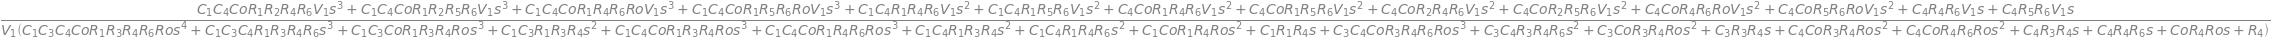

In [59]:
H = u[v9]/u[v1] # system function
H # display the system function

In [62]:
num, denom = fraction(H) #returns numerator and denominator

In [63]:
num

In [64]:
collect((num).expand(),s)

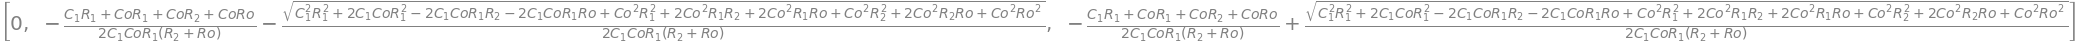

In [65]:
solve(num,s)

In [66]:
denom

In [67]:
collect((denom).expand(),s)

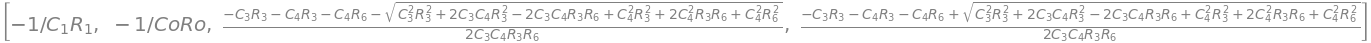

In [68]:
solve(denom,s)

The following SymPy code collects and expands the system equation around s.

The results above are don't seem to be particulary insightful, but are easily obtained by SymPy.

The element values are entered into the equations so that a numerical solution can be obtained.

The element values are entered into the equations so that a numerical solution can be obtained.

V1 is 0.018 volts is this the same as -35dBv ??

In [69]:
10*np.log10(0.018)

In [70]:
20*np.log10(0.018)

In [71]:
10**(-35/20)

In [72]:
10**(-20/10)

In [73]:
# gain of U2, Av = 1 + R5/R4
1+4.3000e+03/2.0000e+03

In [74]:
_*0.018

V1:1.8000e-02,

but try with V1:1

- component selection
  - Caps
  - resistors
  - op amps
- sensitivity, tolerance and temperature analysis



In [75]:
component_values = {
    V1:5.0000e-03,
    C1:3.9000e-08,
    Co:2.0000e-04,
    Ro:4.9900e+02,
    R3:2.3700e+03,
    R1:8.0600e+04,
    R2:8.4500e+03,
    Cp:1.0000e-10,
    R20:4.7000e+04,
    C3:3.3000e-08,
    C4:2.0000e-06,
    R6:5.4900e+04,
    R4:2.0000e+03,
    R5:4.3000e+03,
    R22:1.0000e+04}

In [76]:
# enter the element values, need to set the current source, I1, to zero
equ1a = equ.subs(component_values)

equ1a  # display the equations

⎡                             I_V1 + v₁⋅(1.0e-10⋅s + 2.12765957446809e-5)     
⎢                                                                             
⎢ v₂⋅(3.9e-8⋅s + 0.00201641496392288) - 0.00200400801603206⋅v₃ + v₄⋅(-3.9e-8⋅s
⎢                                                                             
⎢                    -0.00200400801603206⋅v₂ + v₃⋅(0.0002⋅s + 0.00200400801603
⎢                                                                             
⎢v₂⋅(-3.9e-8⋅s - 1.24069478908189e-5) + v₄⋅(3.9e-8⋅s + 0.000130750143157091) -
⎢                                                                             
⎢         I_O1 - 0.000118343195266272⋅v₄ + 0.000540284123536314⋅v₅ - 0.0004219
⎢                                                                             
⎢           -2.0e-6⋅s⋅v₇ - 0.000421940928270042⋅v₅ + v₆⋅(2.033e-6⋅s + 0.000421
⎢                                                                             
⎢                         -2.0e-6⋅s⋅v₆ + v₇⋅(2.0e-6⋅

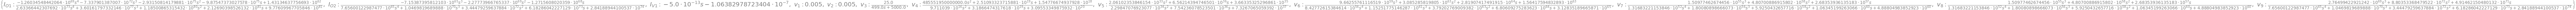

In [77]:
u1 = solve(equ1a,X)
u1

Notice that the values of the exponents are very large in the solution. The numerator and denominator for v5 could be divided by 1e43. Another option for avoiding large exponents is to 1st normalize the component values by frequency scaling. I suppose that large exponents don't become a problem as long as they remain under two digits.

Almost all platforms map Python floats to the IEEE754 double precision - 64 total bits. The float information using the sys package can be as shown as follows:

Letting SciPy do the math and not worrying about the size of the exponents. The system transfer function, is $H(s) = \frac {v9}{V1}$

In [78]:
u1[v1] #/V1

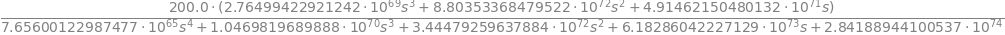

In [79]:
H = u1[v9]/u1[v1]
H

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [80]:
pprint(H,wrap_line=False)

                          ⎛                      3                         2                         ⎞                    
                    200.0⋅⎝2.76499422921242e+69⋅s  + 8.80353368479522e+72⋅s  + 4.91462150480132e+71⋅s⎠                    
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                      4                        3                         2                                                
7.65600122987477e+65⋅s  + 1.0469819689888e+70⋅s  + 3.44479259637884e+72⋅s  + 6.18286042227129e+73⋅s + 2.84188944100537e+74


In [81]:
num, denom = fraction(H) #returns numerator and denominator

In [82]:
num

In [83]:
solve(num,s)

In [84]:
solve(denom,s)

RIAA playback equalization is not a simple low-pass filter. It defines transition points in three places: 75 μs, 318 μs and 3180 μs, which correspond to 2122 Hz, 500 Hz and 50 Hz. The pre-emphasis transfer function is expressed as follows, where T1=3180 μs, T2=318 μs, etc.:

$f(s)=\frac {(sT_{1}+1)(sT_{3}+1)}{(sT_{2}+1)}$

Zeros:  3183.86896860175

Poles:  318.126868995356, 

### 4.4) Pole zero plot

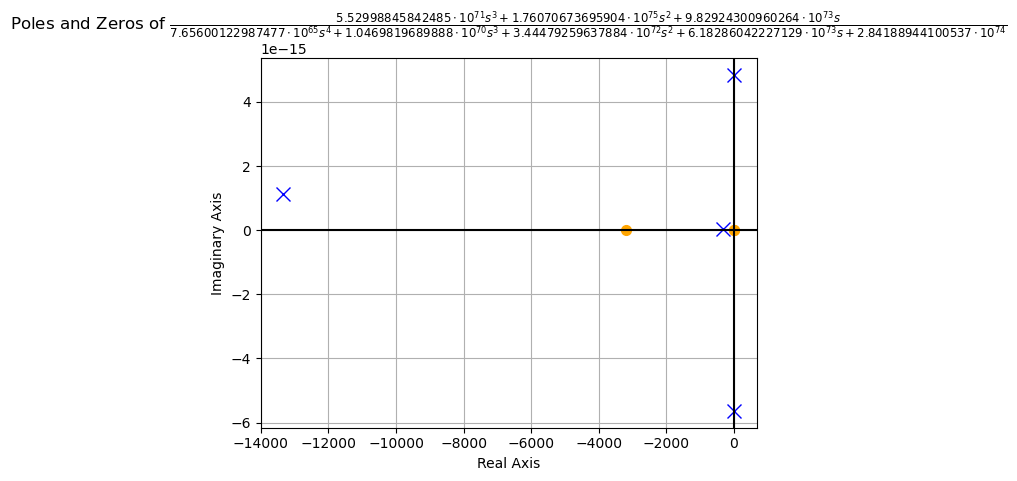

In [85]:
## plot poles and zeros
tf2 = TransferFunction(num, denom, s)

#pole_zero_plot(tf1,show=False)
pole_zero_plot(tf2,show=True)

### 4.5) Bode plot

In [86]:
20*np.log10(.1)

In [87]:
10**(-35/20)

In [88]:
gain1 = TransferFunction(-0.0177827941003892,1,s)

In [89]:
tf2a = Series(tf2, gain1)

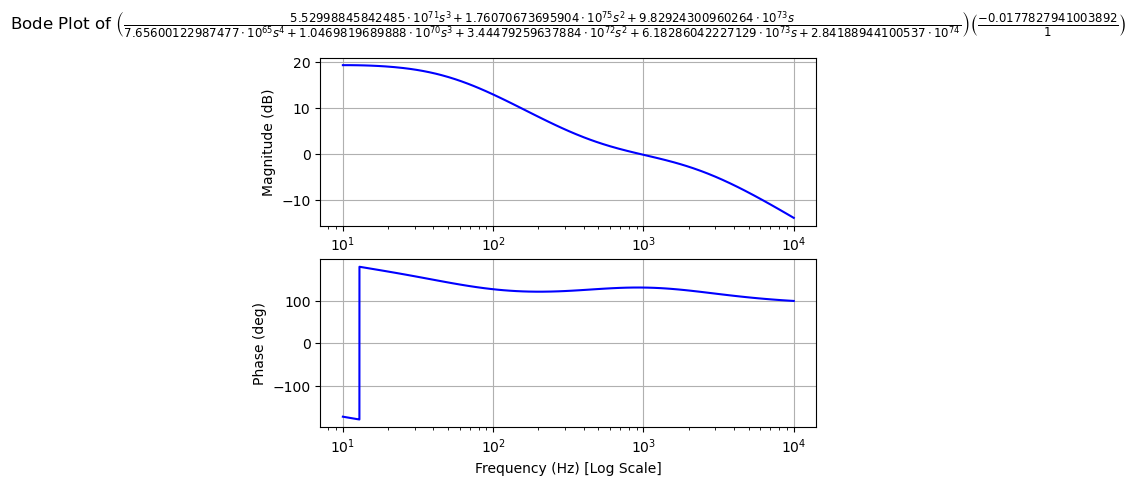

In [90]:
bode_plot(tf2a,initial_exp=1, final_exp=4,freq_unit='Hz', phase_unit='deg')  

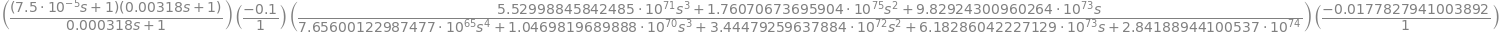

In [91]:
S1 = Series(tf1a, tf2a)
S1

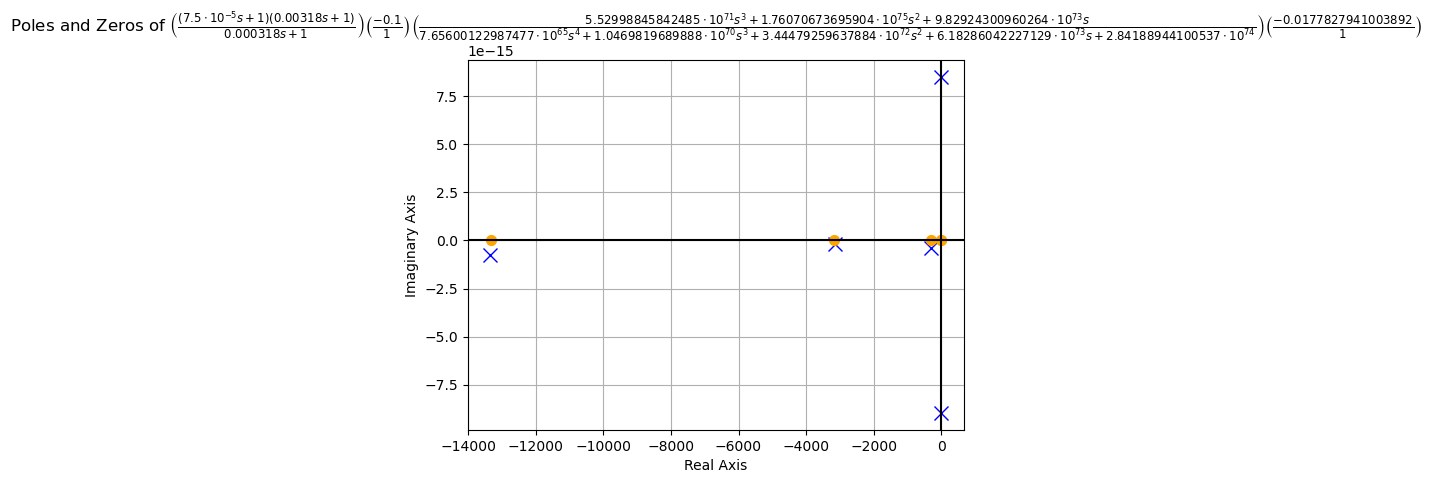

In [92]:
pole_zero_plot(S1)

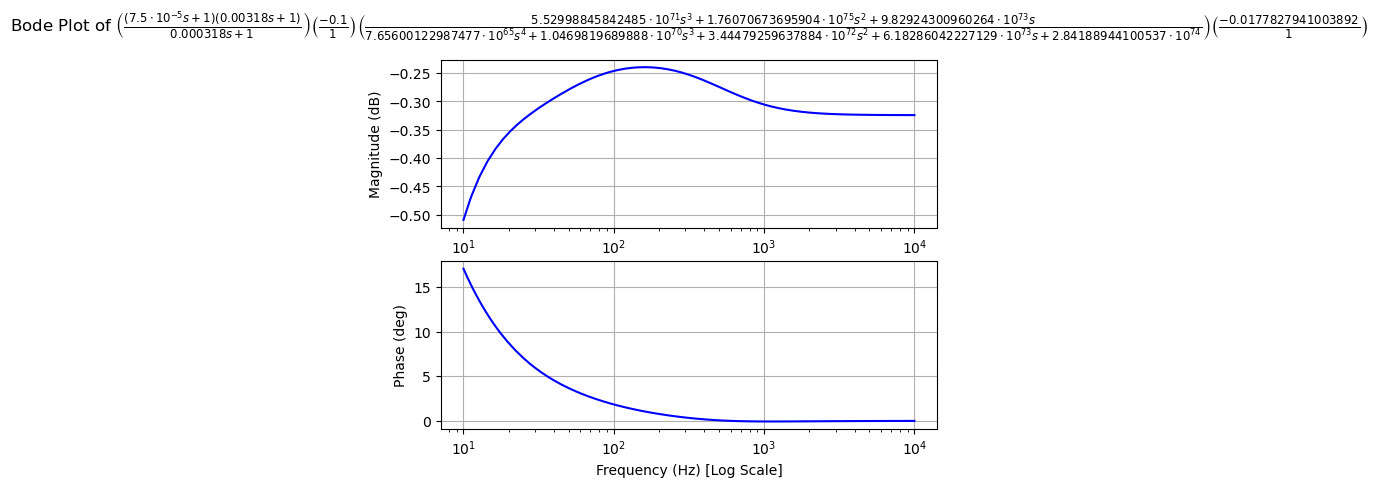

In [93]:
bode_plot(S1,initial_exp=1, final_exp=4,freq_unit='Hz', phase_unit='deg')  

In [94]:
# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system_c1 = (a, b) # system for circuit 1

### 4.6) Impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

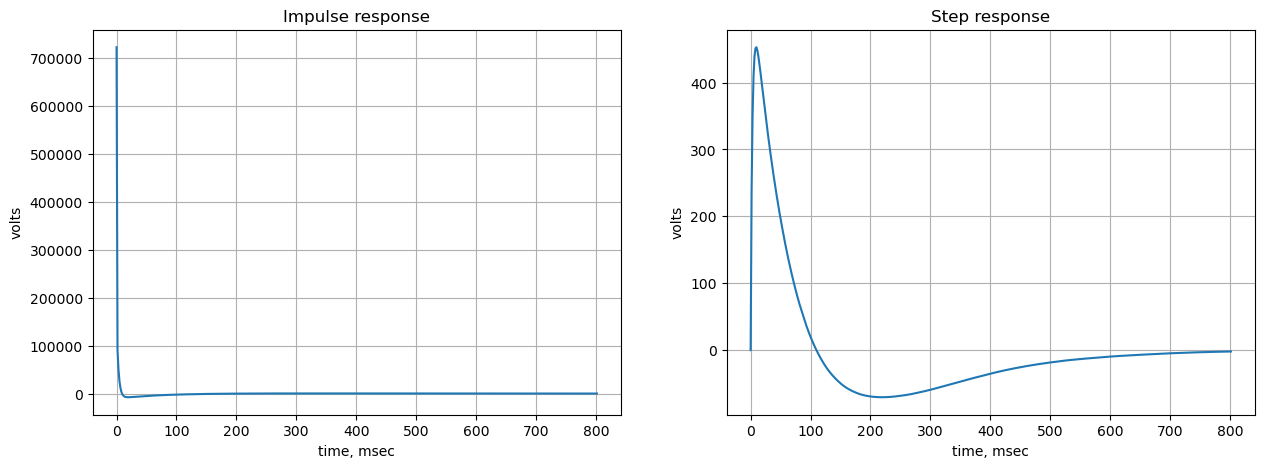

In [95]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(system_c1,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(system_c1,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# space between the plots
#plt.tight_layout(4)

# show plot
plt.show()

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted above. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In practical systems, it is not possible to produce a perfect impulse to serve as input for testing; therefore, a brief pulse is sometimes used as an approximation of an impulse. Provided that the pulse is short enough compared to the impulse response, the result will be close to the true, theoretical, impulse response.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

### Bode plot - See above, need to re organize
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter.

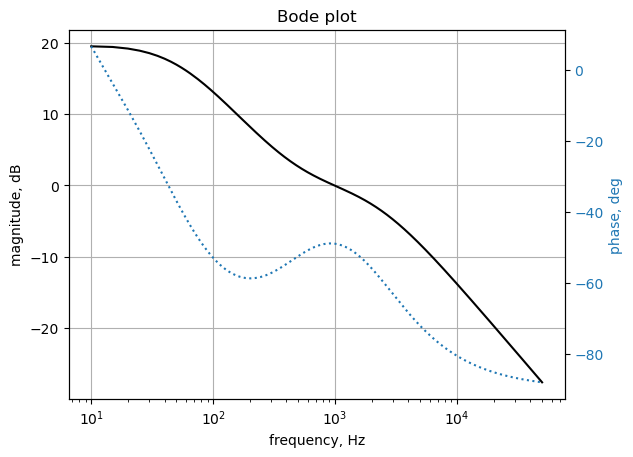

In [96]:
x = np.linspace(10*2*np.pi, 50e3*2*np.pi, 10000, endpoint=True)
w_c1, mag_c1, phase_c1 = signal.bode(system_c1, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

#plt.semilogx(w, mag)    # Bode magnitude plot
#plt.plot(w/(2*np.pi*1e6), mag,'-k')    # Bode magnitude plot
#plt.plot(w/(2*np.pi), mag,'-k')    # Bode magnitude plot
plt.semilogx(w_c1/(2*np.pi), mag_c1-34.8387,'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
#ax1.set_xlim((27e6*2*np.pi,33e6*2*np.pi))
#ax1.set_xlim((27,33))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

#plt.semilogx(w, phase,'-g')  # Bode phase plot
#plt.plot(w/(2*np.pi), phase,':',color=color)  # Bode phase plot
plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color=color)  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

## find gain at 1Khz

In [97]:
w_c1

array([6.28318531e+01, 9.42446377e+01, 1.25657422e+02, ...,
       3.14096440e+05, 3.14127853e+05, 3.14159265e+05])

In [98]:
np.diff(w_c1)

array([31.41278463, 31.41278463, 31.41278463, ..., 31.41278463,
       31.41278463, 31.41278463])

In [99]:
np.gradient(w_c1)

array([31.41278463, 31.41278463, 31.41278463, ..., 31.41278463,
       31.41278463, 31.41278463])

In [100]:
mag_c1

array([54.32273597, 54.23176407, 54.00773139, ...,  7.22580122,
        7.22493407,  7.224067  ])

In [101]:
w_c1/(2*np.pi)

array([1.00000000e+01, 1.49994999e+01, 1.99989999e+01, ...,
       4.99900010e+04, 4.99950005e+04, 5.00000000e+04])

In [102]:
np.where(w_c1 > 999.9*2*np.pi)

(array([ 198,  199,  200, ..., 9997, 9998, 9999]),)

In [103]:
w_c1[198]/(2*np.pi)

In [104]:
w_c1[199]/(2*np.pi)

In [105]:
mag_c1[199]

In [106]:
mag_c1[198]

In [107]:
phase_c1

array([  6.60864219,  -3.88378121, -11.32515646, ..., -88.08765905,
       -88.08785   , -88.08804091])

In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

In [108]:
# Find neasest position in the array where the value is located
def find_nearest(array,value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

In [109]:
# gain margin
print('gain margin = {:.2f} dB'.format(mag_c1[find_nearest(phase_c1, -180)]))

gain margin = 7.22 dB


In [110]:
# phase margin
print('phase margin = {:.2f} deg'.format(phase_c1[find_nearest(mag_c1, -0.1 )] - (-180)))

phase margin = 91.91 deg


### 4.7) Group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

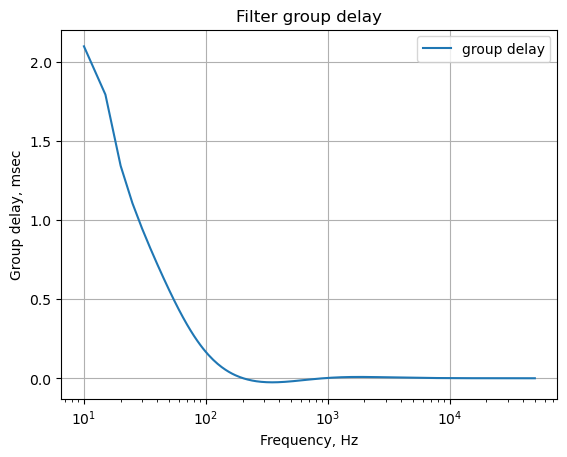

In [111]:
plt.title('Filter group delay')
#plt.semilogx(w_c1/(2*np.pi), -np.gradient(phase_c1)/np.gradient(w_c1)/1e-3,'-',label='group delay')
plt.semilogx(w_c1/(2*np.pi), -np.gradient(phase_c1)/np.gradient(w_c1/(2*np.pi)),'-',label='group delay')
#plt.semilogx(w_c1/(2*np.pi), -np.gradient(phase_c1)/w_c1/1e-3,'-',label='phase delay')
plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

get data from LTSpice and compare results on a graph. LTSpice runs from 7 to 0 ms.

Seem like need to mult by 20 to get same group delay.  Why 20 ??   

The results obtained from the python code do not agree with LTspice. LTspice shows the group delay at 100Hz to be -278.4us, the plot above shows 16msec at about 100Hz. LTspice gives the phase at -10.5 deg at 100Hz, the bode plot above shows about -10 degrees. This difference needs to be explored.

The results above are don't seem to be particulary insightful, but are easily obtained by SymPy.

The element values are entered into the equations so that a numerical solution can be obtained.

The plot above shows that for frequencies below 200 Hz, there is a large amount of delay that is frequency dependent. Presumably, the delay compensates for the de-emphases introduced in the record cutting process.  

### 4.8) Comparing results to LTSpice
- with LTSpice
- 

/home/jeff64/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/Two amplifier RIAA Phone Preamp.csv



In [112]:
os.chdir('/home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/Two amplifier RIAA Phone Preamp/') # change directory to csv file location

fn = 'Two amplifier RIAA Phone Preamp.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

# change the working director back to the Jupyter folder
os.chdir('/home/jeff32/Documents/JupyterLab/Node Analysis/')  

In [113]:
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

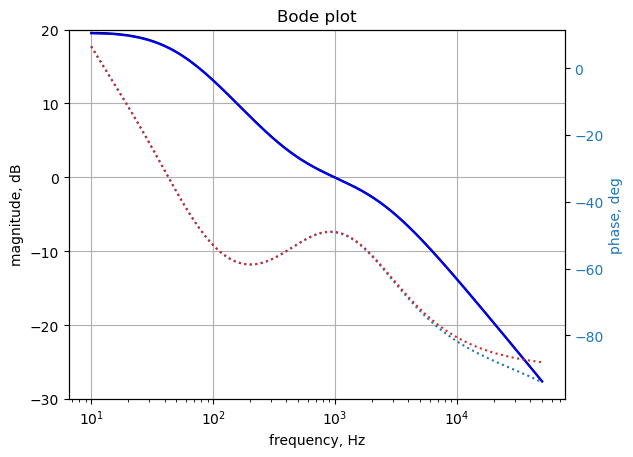

In [114]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage))+11.257,'-k')    # Bode magnitude plot, adding 11.257 dBV offset to normalized LTSpice data at 1KHz
plt.semilogx(w_c1/(2*np.pi), mag_c1-34.8387,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot

plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

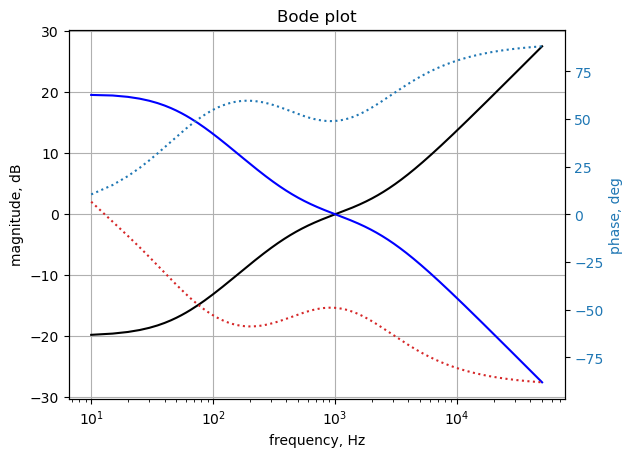

In [115]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

#plt.semilogx(w, mag)    # Bode magnitude plot
#plt.plot(w/(2*np.pi*1e6), mag,'-k')    # Bode magnitude plot
#plt.plot(w/(2*np.pi), mag,'-k')    # Bode magnitude plot
plt.semilogx(w_petf/(2*np.pi), mag_petf-20,'-k')    # Bode magnitude plot
plt.semilogx(w_c1/(2*np.pi), mag_c1-34.8387,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
#ax1.set_xlim((27e6*2*np.pi,33e6*2*np.pi))
#ax1.set_xlim((27,33))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

#plt.semilogx(w, phase,'-g')  # Bode phase plot
#plt.plot(w/(2*np.pi), phase,':',color=color)  # Bode phase plot
plt.semilogx(w_petf/(2*np.pi), phase_petf,':',color=color)  # Bode phase plot
plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

### 4.9) Preamplifier deviation from RIAA response

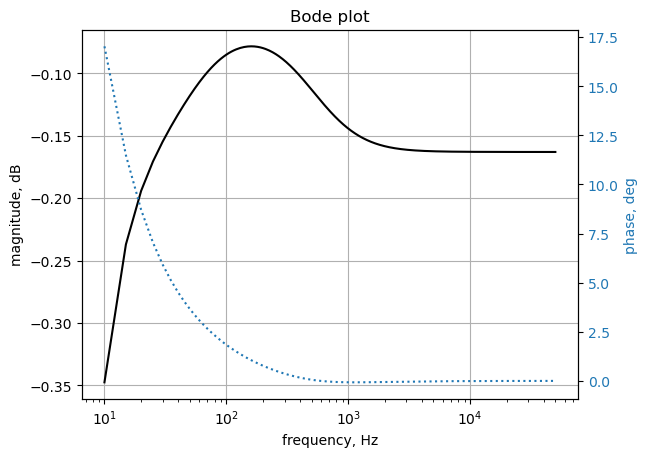

In [116]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

#plt.semilogx(w, mag)    # Bode magnitude plot
#plt.plot(w/(2*np.pi*1e6), mag,'-k')    # Bode magnitude plot
#plt.plot(w/(2*np.pi), mag,'-k')    # Bode magnitude plot
plt.semilogx(w_petf/(2*np.pi), (mag_petf-20) + mag_c1-34.8387,'-k')    # Bode magnitude plot
#plt.semilogx(w_c1/(2*np.pi), mag_c1,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
#ax1.set_xlim((20*2*np.pi,20e3*2*np.pi))
#ax1.set_xlim((27,33))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

#plt.semilogx(w, phase,'-g')  # Bode phase plot
#plt.plot(w/(2*np.pi), phase,':',color=color)  # Bode phase plot
plt.semilogx(w_petf/(2*np.pi), phase_petf+phase_c1,':',color=color)  # Bode phase plot
#plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))
#ax2.set_xlim((20*2*np.pi,20e3*2*np.pi))

plt.title('Bode plot')
plt.show()

Comments: 




### 4.10) Implementation considerations
Comments on alternate realization. 
- LP vinal source is inherently noisy, don't need preamp to be 10x better, only blameless 
- power supply design
- choice of OpAmps, Caps and resistors
- other filter 


- component selection
  - Caps
  - resistors
  - op amps
- sensitivity, tolerance and temperature analysis


Other links

https://sound-au.com/project27.htm
https://sound-au.com/project25.htm
https://sound-au.com/project06.htm

## 5) Alternate designs <a id="section5"></a>

search for RIAA preamp schematics

https://www.petervis.com/record_players_and_turntables/riaa-preamp-circuit-lf353n/phono-preamplifier.html

https://www.pinterest.com/pin/600878775274473107/
https://paulinthelab.blogspot.com/2014/05/riaa-phono-preamp-stripboard-layout.html

https://www.tubecad.com/2020/03/blog0496.htm


### 5.1) circuit 1 

### 5.2) circuit 2 

### 5.2) circuit N 



### 5.X) Filter sysnthese from the transfer function

OK, now considering the inverse of the pre-emphis curve.

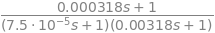

In [117]:
tf2 = TransferFunction(s*318e-6+1,(s*3180e-6+1)*(s*75e-6+1), s)
tf2

In [118]:
tf2.expand()

In [119]:
tf2_expanded = tf2.to_expr().expand()
tf2_expanded

See Electronic Filter Design Handbook page 2.4, eq (2-3) for 2nd term and page 5.52 eq (5.89) for 1st term. Synthesis by equating coefficients. 

In [120]:
expr1 = tf2_expanded.args[1]
expr1

In [121]:
expr2 = apart(tf2_expanded.args[0])
expr2

In [122]:
expr1 + expr2

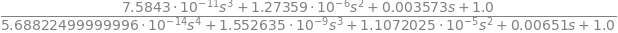

In [123]:
(expr1 + expr2).simplify()

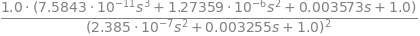

In [124]:
(expr1 + expr2).factor()

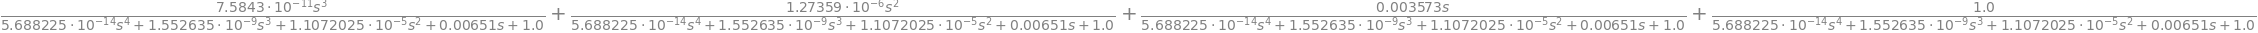

In [125]:
(expr1 + expr2).factor().expand()

In [126]:
(expr1 + expr2) #.expand()

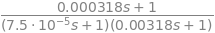

In [127]:
(s*318e-6+1)/((s*3180e-6+1)*(s*75e-6+1))

In [128]:
(s*318e-6+1)/(s*3180e-6+1) #*(1/*(s*75e-6+1)

In [129]:
1/(s*75e-6+1) # This is a high pass section

In [130]:
(s*318e-6+1).factor()

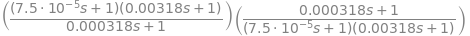

In [131]:
tf3 = Series(tf1, tf2)
tf3

In [132]:
tf3.to_expr().simplify()

## 6) Summary  <a id="section6"></a>
- gain errors don't agree
- group delay not in agreement